In [658]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import make_column_selector

Collecting Data and turn it into DataFrame

In [659]:
link_csv = 'https://raw.githubusercontent.com/aameliasakinah/ClassificationNutritionTA/refs/heads/main/Data.csv'
fix_data = pd.read_csv(link_csv)
fix_data.head()

,No,NIK,Nama,JK,Tgl Lahir,BB Lahir,TB Lahir,Nama Ortu,Prov,Kab/Kota,...,TB/U,ZS TB/U,BB/TB,ZS BB/TB,Naik Berat Badan,PMT Diterima (kg),Jml Vit A,KPSP,KIA,Detail
0,1,3314010911170002,NAUFAL ARFAN PRADYASTA,L,2019-11-09,2.8,0.0,TRI PAMONO,JAWA TENGAH,KAB SRAGEN,...,Normal,0.89,Normal,-0.85,N,-,NaN,-,-,
1,2,3314101709198620,ALFARO AFHAM SYAHRUR,L,2019-09-17,2.9,49.0,SELI PUSPITASARI-YOVI HASTO P,JAWA TENGAH,KAB SRAGEN,...,Normal,-0.62,Normal,0.2,O,-,NaN,-,-,
2,3,3314016310190001,ALFIA KHOIRUN NISA,P,2019-10-23,3.0,0.0,SUSI RAHAYU-KRESNO KUNCORO,JAWA TENGAH,KAB SRAGEN,...,Normal,-1.19,Normal,-0.58,N,-,NaN,-,-,
3,4,3314014909190001,ANANDA NATASYA MEDINA PUTRI,P,2019-09-09,3.4,0.0,LISTANTO-SILVI AMALIA,JAWA TENGAH,KAB SRAGEN,...,Normal,-1.44,Normal,0.74,N,-,NaN,-,-,
4,5,3314011309190001,MUH MAULANA,L,2019-09-13,3.0,48.0,MARDIANTO,JAWA TENGAH,KAB SRAGEN,...,Normal,-0.35,Gizi Kurang,-2.86,T,-,NaN,-,-,


In [660]:
fix_data_columns = fix_data.columns.to_list()
fix_data_columns

['No',
 'NIK',
 'Nama',
 'JK',
 'Tgl Lahir',
 'BB Lahir',
 'TB Lahir',
 'Nama Ortu',
 'Prov',
 'Kab/Kota',
 'Kec',
 'Pukesmas',
 'Desa/Kel',
 'Posyandu',
 'RT',
 'RW',
 'Alamat',
 'Usia Saat Ukur',
 'Tanggal Pengukuran',
 'Berat',
 'Tinggi',
 'Cara Ukur',
 'LiLA',
 'BB/U',
 'ZS BB/U',
 'TB/U',
 'ZS TB/U',
 'BB/TB',
 'ZS BB/TB',
 'Naik Berat Badan',
 'PMT Diterima (kg)',
 'Jml Vit A',
 'KPSP',
 'KIA',
 'Detail']

## Preprocessing

# Data Cleaning

Drop Kolom yang Tidak Terpakai

In [661]:
fix_data = fix_data.copy()
fix_data.drop(columns=['No', 'NIK', 'Nama', 'Nama Ortu', 'Prov', 'Kab/Kota', 'Kec', 'Pukesmas', 'Desa/Kel',
                         'Posyandu', 'RT', 'RW', 'Alamat', 'Tanggal Pengukuran', 'Cara Ukur', 'ZS BB/U', 'ZS TB/U', 'ZS BB/TB',
                         'PMT Diterima (kg)', 'Jml Vit A', 'KPSP', 'KIA', 'Detail', 'Naik Berat Badan'],
                         inplace=True)

fix_data.head()

,JK,Tgl Lahir,BB Lahir,TB Lahir,Usia Saat Ukur,Berat,Tinggi,LiLA,BB/U,TB/U,BB/TB
0,L,2019-11-09,2.8,0.0,4 Tahun - 10 Bulan - 4 Hari,18.2,113,NaN,Berat Badan Normal,Normal,Normal
1,L,2019-09-17,2.9,49.0,4 Tahun - 11 Bulan - 24 Hari,17.8,107,19.0,Berat Badan Normal,Normal,Normal
2,P,2019-10-23,3.0,0.0,4 Tahun - 10 Bulan - 12 Hari,15.3,103,0.0,Berat Badan Normal,Normal,Normal
3,P,2019-09-09,3.4,0.0,4 Tahun - 11 Bulan - 26 Hari,17.1,102.5,0.0,Berat Badan Normal,Normal,Normal
4,L,2019-09-13,3.0,48.0,4 Tahun - 11 Bulan - 21 Hari,14.1,108.2,16.0,Berat Badan Normal,Normal,Gizi Kurang


Konversi Nilai Kolom ke Numerik

In [662]:
columns = ['BB Lahir', 'TB Lahir', 'Berat', 'Tinggi', 'LiLA']
fix_data[columns] = fix_data[columns].apply(pd.to_numeric, errors="coerce")

# Date Time Columns
date_columns = ['Tgl Lahir']
fix_data[date_columns] = fix_data[date_columns].apply(pd.to_datetime, errors="coerce")

fix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   JK              3129 non-null   object        
 1   Tgl Lahir       3129 non-null   datetime64[ns]
 2   BB Lahir        3129 non-null   float64       
 3   TB Lahir        3012 non-null   float64       
 4   Usia Saat Ukur  3129 non-null   object        
 5   Berat           3129 non-null   float64       
 6   Tinggi          3128 non-null   float64       
 7   LiLA            2746 non-null   float64       
 8   BB/U            3129 non-null   object        
 9   TB/U            3129 non-null   object        
 10  BB/TB           3129 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 269.0+ KB


Mencari dan Mengganti Nilai Data NaN/Null dengan Median

In [663]:
fix_data.isna().sum()

,0
JK,0
Tgl Lahir,0
BB Lahir,0
TB Lahir,117
Usia Saat Ukur,0
Berat,0
Tinggi,1
LiLA,383
BB/U,0
TB/U,0


In [664]:
null_columns = fix_data.columns[fix_data.isna().any()]
fix_data[null_columns] = fix_data[null_columns].apply(lambda col: col.fillna(col.median()))
fix_data.isna().sum()

,0
JK,0
Tgl Lahir,0
BB Lahir,0
TB Lahir,0
Usia Saat Ukur,0
Berat,0
Tinggi,0
LiLA,0
BB/U,0
TB/U,0


Mengecek jika ada Nilai Kosong di Kolom Numerik

In [665]:
print((fix_data == 0).sum())

JK                   0
Tgl Lahir            0
BB Lahir            39
TB Lahir           276
Usia Saat Ukur       0
Berat                0
Tinggi               0
LiLA              1104
BB/U                 0
TB/U                 0
BB/TB                0
dtype: int64


Menutupi semua nilai 0 pada setiap kolom dengan Median

In [666]:
columns_w_zero = fix_data.select_dtypes(include=['number']).columns[(fix_data.select_dtypes(include=['number']) == 0).any()].tolist()
fix_data[columns_w_zero] = fix_data[columns_w_zero].apply(lambda col: col.mask(col == 0, col.median()))
print((fix_data == 0).sum())

JK                0
Tgl Lahir         0
BB Lahir          0
TB Lahir          0
Usia Saat Ukur    0
Berat             0
Tinggi            0
LiLA              0
BB/U              0
TB/U              0
BB/TB             0
dtype: int64


Cari dan Drop Nilai yang Duplikat

In [667]:
total_duplikat = fix_data.duplicated().sum()
print(f"Total Duplikat Data: {total_duplikat}")

Total Duplikat Data: 417


## Data Formatting

Memisahkan Tanggal Lahir dan Tanggal Pengukuran

In [668]:
#Tanggal Lahir
tanggal_lahir = fix_data[["Tgl Lahir"]]
tahun_lahir = tanggal_lahir["Tgl Lahir"].dt.year.rename("Tahun Lahir")
bulan_lahir = tanggal_lahir["Tgl Lahir"].dt.month.rename("Bulan Lahir")
hari_lahir = tanggal_lahir["Tgl Lahir"].dt.day.rename("Hari Lahir")

list_columns = [tahun_lahir, bulan_lahir, hari_lahir]

for column in reversed(list_columns):
    idx = 2
    fix_data.insert(idx, column.name, column)
    idx += 1

fix_data.head()

,JK,Tgl Lahir,Tahun Lahir,Bulan Lahir,Hari Lahir,BB Lahir,TB Lahir,Usia Saat Ukur,Berat,Tinggi,LiLA,BB/U,TB/U,BB/TB
0,L,2019-11-09,2019,11,9,2.8,49.0,4 Tahun - 10 Bulan - 4 Hari,18.2,113.0,14.0,Berat Badan Normal,Normal,Normal
1,L,2019-09-17,2019,9,17,2.9,49.0,4 Tahun - 11 Bulan - 24 Hari,17.8,107.0,19.0,Berat Badan Normal,Normal,Normal
2,P,2019-10-23,2019,10,23,3.0,49.0,4 Tahun - 10 Bulan - 12 Hari,15.3,103.0,14.0,Berat Badan Normal,Normal,Normal
3,P,2019-09-09,2019,9,9,3.4,49.0,4 Tahun - 11 Bulan - 26 Hari,17.1,102.5,14.0,Berat Badan Normal,Normal,Normal
4,L,2019-09-13,2019,9,13,3.0,48.0,4 Tahun - 11 Bulan - 21 Hari,14.1,108.2,16.0,Berat Badan Normal,Normal,Gizi Kurang


In [669]:
# Drop Tgl Lahir and Tanggal Pengukuran Column
fix_data.drop(columns=["Tgl Lahir"], inplace=True)
fix_data.head()

,JK,Tahun Lahir,Bulan Lahir,Hari Lahir,BB Lahir,TB Lahir,Usia Saat Ukur,Berat,Tinggi,LiLA,BB/U,TB/U,BB/TB
0,L,2019,11,9,2.8,49.0,4 Tahun - 10 Bulan - 4 Hari,18.2,113.0,14.0,Berat Badan Normal,Normal,Normal
1,L,2019,9,17,2.9,49.0,4 Tahun - 11 Bulan - 24 Hari,17.8,107.0,19.0,Berat Badan Normal,Normal,Normal
2,P,2019,10,23,3.0,49.0,4 Tahun - 10 Bulan - 12 Hari,15.3,103.0,14.0,Berat Badan Normal,Normal,Normal
3,P,2019,9,9,3.4,49.0,4 Tahun - 11 Bulan - 26 Hari,17.1,102.5,14.0,Berat Badan Normal,Normal,Normal
4,L,2019,9,13,3.0,48.0,4 Tahun - 11 Bulan - 21 Hari,14.1,108.2,16.0,Berat Badan Normal,Normal,Gizi Kurang


# Drop Kolom Tgl Lahir and Tanggal Pengukuran

In [670]:
# Format the Usia Saat Ukur column

def format_usia(usia = list|dict|str):
    usia_format = usia.split(' - ')
    tahun_lahir = int(usia_format[0].split()[0])
    bulan_lahir = int(usia_format[1].split()[0])
    hari_lahir = int(usia_format[2].split()[0])
    total_bulan = tahun_lahir * 12 + bulan_lahir + hari_lahir / 30
    return round(total_bulan, 1)


fix_data.insert(7, "Usia dalam bulan", fix_data["Usia Saat Ukur"].apply(format_usia))
fix_data.head()

,JK,Tahun Lahir,Bulan Lahir,Hari Lahir,BB Lahir,TB Lahir,Usia Saat Ukur,Usia dalam bulan,Berat,Tinggi,LiLA,BB/U,TB/U,BB/TB
0,L,2019,11,9,2.8,49.0,4 Tahun - 10 Bulan - 4 Hari,58.1,18.2,113.0,14.0,Berat Badan Normal,Normal,Normal
1,L,2019,9,17,2.9,49.0,4 Tahun - 11 Bulan - 24 Hari,59.8,17.8,107.0,19.0,Berat Badan Normal,Normal,Normal
2,P,2019,10,23,3.0,49.0,4 Tahun - 10 Bulan - 12 Hari,58.4,15.3,103.0,14.0,Berat Badan Normal,Normal,Normal
3,P,2019,9,9,3.4,49.0,4 Tahun - 11 Bulan - 26 Hari,59.9,17.1,102.5,14.0,Berat Badan Normal,Normal,Normal
4,L,2019,9,13,3.0,48.0,4 Tahun - 11 Bulan - 21 Hari,59.7,14.1,108.2,16.0,Berat Badan Normal,Normal,Gizi Kurang


In [671]:
# Drop Nilai yang Tidak Normal Disetiap Kolom
# Deteksi Semua Data yang Tidak Normal dengan Nilai Maksimal
# Drop Nilai Tertinggi dari BB Lahir dan TB lahir

# BB Lahir = 4200.00 as abnormal since no human babies in this world born in 4.200Kg Weight
# TB Lahir = 106 as Abnormal since no human babies in this world born and got 106Cm Height\

fix_data.max()
fix_data[["BB Lahir"]].max()

,0
BB Lahir,4200.0


# Visualization Data

In [672]:
fix_data.head()

,JK,Tahun Lahir,Bulan Lahir,Hari Lahir,BB Lahir,TB Lahir,Usia Saat Ukur,Usia dalam bulan,Berat,Tinggi,LiLA,BB/U,TB/U,BB/TB
0,L,2019,11,9,2.8,49.0,4 Tahun - 10 Bulan - 4 Hari,58.1,18.2,113.0,14.0,Berat Badan Normal,Normal,Normal
1,L,2019,9,17,2.9,49.0,4 Tahun - 11 Bulan - 24 Hari,59.8,17.8,107.0,19.0,Berat Badan Normal,Normal,Normal
2,P,2019,10,23,3.0,49.0,4 Tahun - 10 Bulan - 12 Hari,58.4,15.3,103.0,14.0,Berat Badan Normal,Normal,Normal
3,P,2019,9,9,3.4,49.0,4 Tahun - 11 Bulan - 26 Hari,59.9,17.1,102.5,14.0,Berat Badan Normal,Normal,Normal
4,L,2019,9,13,3.0,48.0,4 Tahun - 11 Bulan - 21 Hari,59.7,14.1,108.2,16.0,Berat Badan Normal,Normal,Gizi Kurang


In [673]:
fix_data.describe()

,Tahun Lahir,Bulan Lahir,Hari Lahir,BB Lahir,TB Lahir,Usia dalam bulan,Berat,Tinggi,LiLA
count,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000
mean,2021.548418,6.546820,15.673378,95.604561,48.401275,31.647491,11.360578,85.714382,15.031176
std,1.402514,3.409658,8.719928,516.400215,4.912436,16.274688,3.145117,12.602307,4.148691
min,2019.000000,1.000000,1.000000,0.350000,0.490000,0.000000,2.000000,43.000000,1.000000
25%,2020.000000,4.000000,8.000000,3.000000,48.000000,18.100000,9.200000,77.000000,14.000000
50%,2021.000000,6.000000,16.000000,3.000000,49.000000,32.400000,11.400000,87.000000,14.000000
75%,2023.000000,10.000000,23.000000,3.300000,49.000000,45.400000,13.500000,95.400000,15.500000
max,2024.000000,12.000000,31.000000,4200.000000,106.000000,60.100000,62.000000,115.000000,155.000000


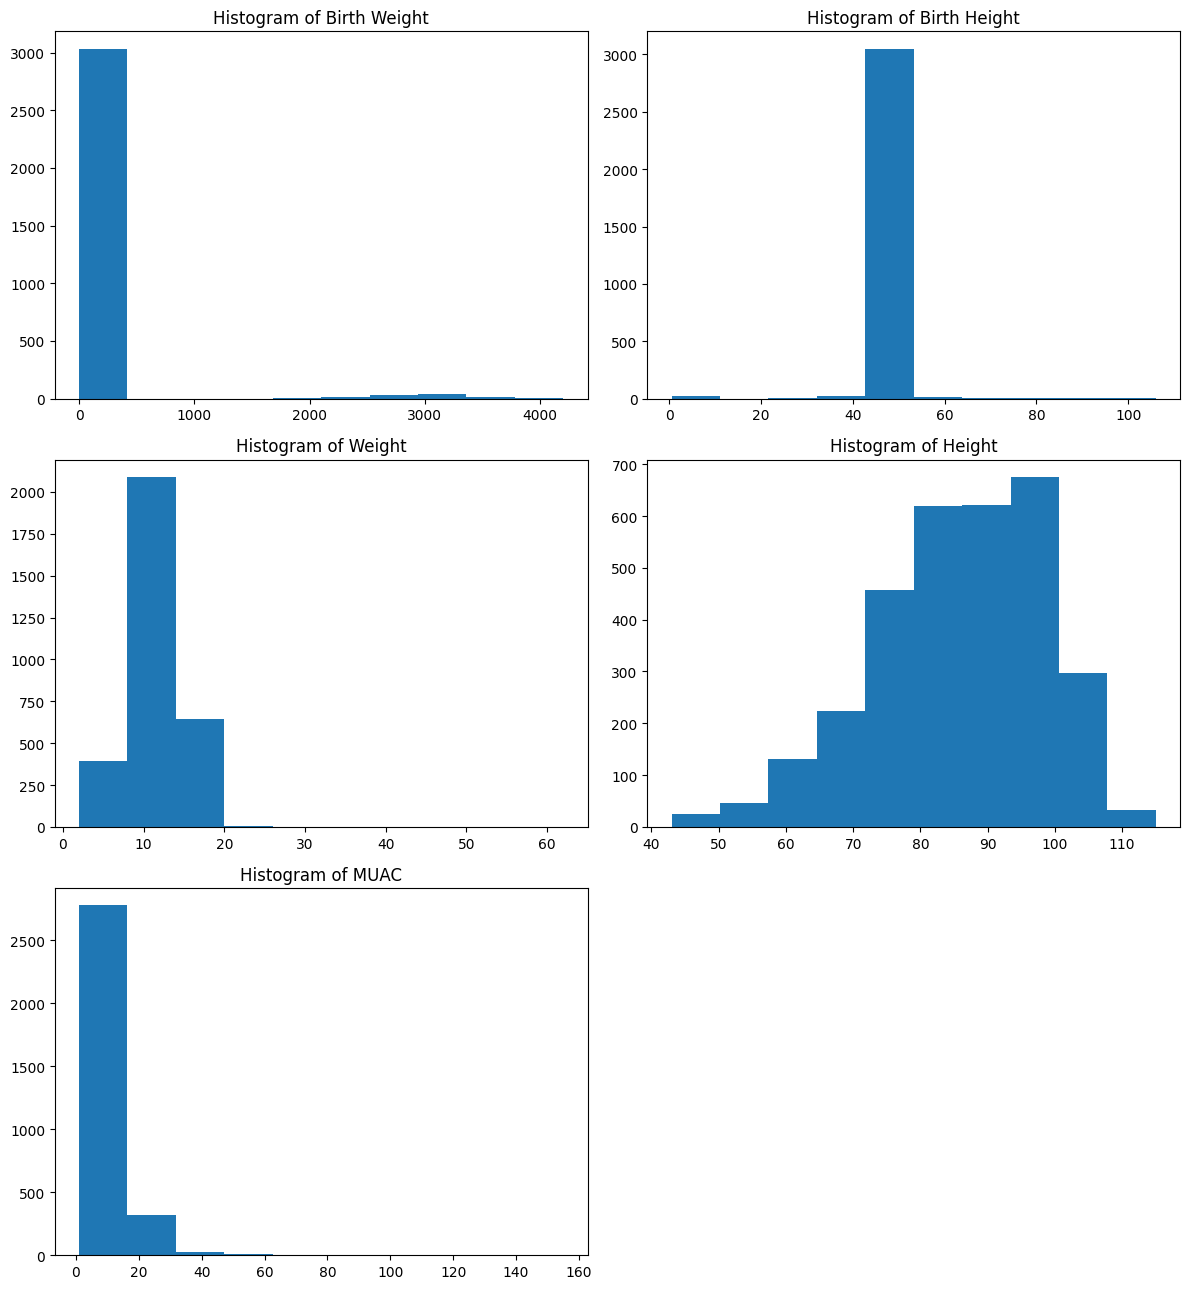

In [674]:
# Histogram
fig, axs = plt.subplots(3, 2, figsize=(12,13))

# BB Lahir dan TB Lahir
axs[0,0].hist(fix_data["BB Lahir"].dropna())
axs[0,0].set_title("Histogram of Birth Weight")

axs[0,1].hist(fix_data["TB Lahir"].dropna())
axs[0,1].set_title("Histogram of Birth Height")

# Berat, Tinggi, dan LiLA (Saat Pengukuran)
axs[1,0].hist(fix_data["Berat"].dropna())
axs[1,0].set_title("Histogram of Weight")

axs[1,1].hist(fix_data["Tinggi"].dropna())
axs[1,1].set_title("Histogram of Height")

axs[2,0].hist(fix_data["LiLA"].dropna())
axs[2,0].set_title("Histogram of MUAC")

# Hapus subplot kosong
fig.delaxes(axs[2,1])

# Menyesuaikan tata letak
plt.tight_layout()

# Menyimpan gambar sebagai PNG
plt.savefig("histogram_output.png", dpi=300)

# Menampilkan plot
plt.show()

/tmp/ipython-input-675-3653318413.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  orange_cmap = cm.get_cmap("Oranges")
/tmp/ipython-input-675-3653318413.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data1, x="Value", y="Variable", palette=colors_1, ax=axs[0])
/tmp/ipython-input-675-3653318413.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data2, x="Value", y="Variable", palette=colors_2, ax=axs[1])


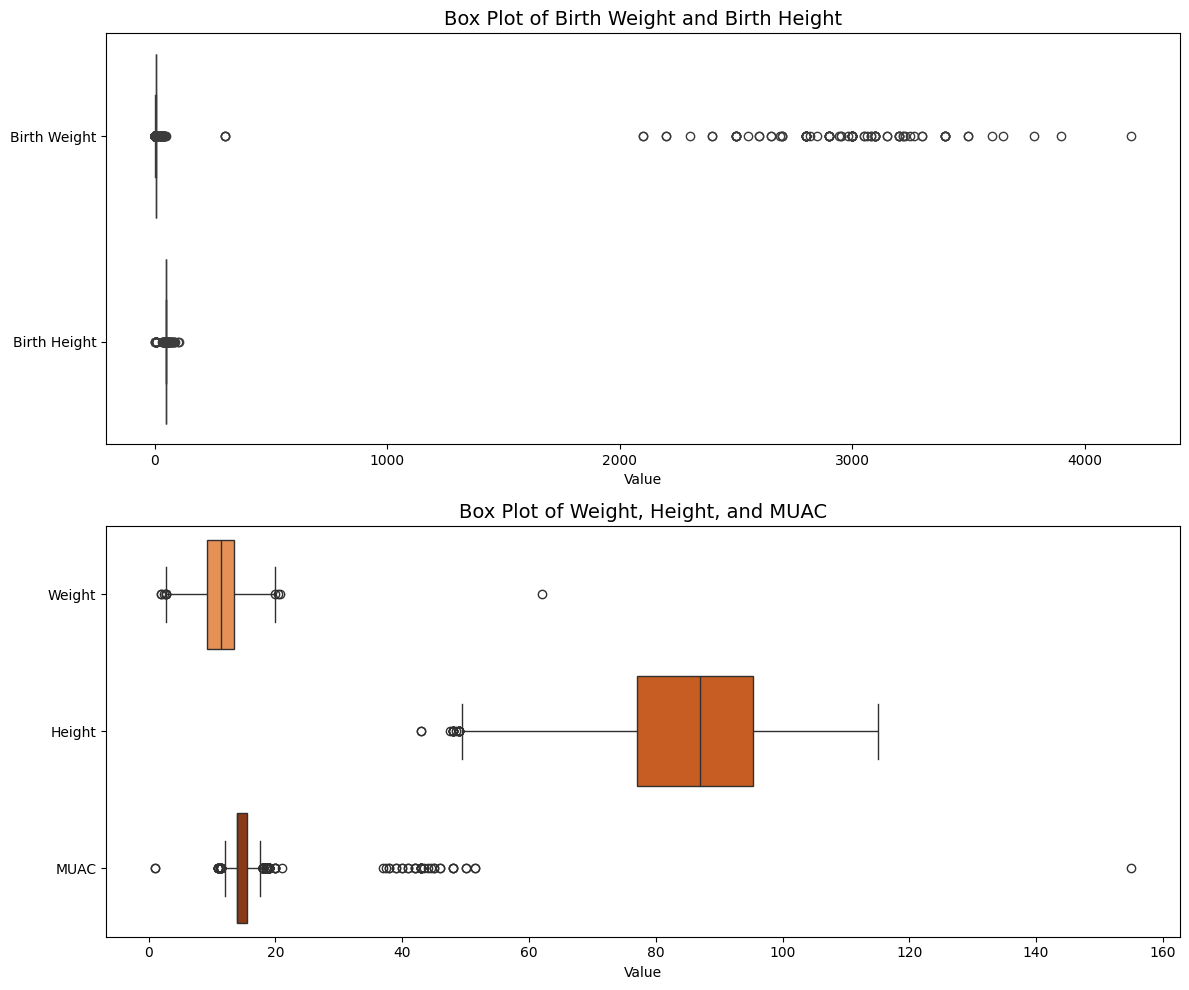

In [675]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import numpy as np
import pandas as pd

# Rename kolom terlebih dahulu
fix_data = fix_data.rename(columns={
    "BB Lahir": "Birth Weight",
    "TB Lahir": "Birth Height",
    "Berat": "Weight",
    "Tinggi": "Height",
    "LiLA": "MUAC"
})

# Ambil colormap Oranges
orange_cmap = cm.get_cmap("Oranges")

# Buat warna gradasi orange sesuai jumlah kolom
colors_1 = [orange_cmap(i) for i in np.linspace(0.5, 0.8, 2)]  # Birth Weight & Height
colors_2 = [orange_cmap(i) for i in np.linspace(0.5, 0.9, 3)]  # Weight, Height, MUAC

# Melt data menjadi long-format
data1 = pd.melt(fix_data[["Birth Weight", "Birth Height"]], var_name="Variable", value_name="Value")
data2 = pd.melt(fix_data[["Weight", "Height", "MUAC"]], var_name="Variable", value_name="Value")

# Plot
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Boxplot pertama
sns.boxplot(data=data1, x="Value", y="Variable", palette=colors_1, ax=axs[0])
axs[0].set_title("Box Plot of Birth Weight and Birth Height", fontsize=14)
axs[0].set_xlabel("Value")
axs[0].set_ylabel("")

# Boxplot kedua
sns.boxplot(data=data2, x="Value", y="Variable", palette=colors_2, ax=axs[1])
axs[1].set_title("Box Plot of Weight, Height, and MUAC", fontsize=14)
axs[1].set_xlabel("Value")
axs[1].set_ylabel("")

plt.tight_layout()
plt.show()

Berdasarkan Histogram dan Boxplot data diatas berpotensi memiliki banyak outlier.Jadi berdasarkan informasi tersebut, kita akan mengidentifikasi dan menghitung total outlier di setiap kolom

In [676]:
#Kolom BB Lahir
Q1 = fix_data["Birth Weight"].quantile(0.25)
Q2 = fix_data["Birth Weight"].median()
Q3 = fix_data["Birth Weight"].quantile(0.75)

IQR = Q3 - Q1 # Difference between Quantile 1 and 3

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

lower_bound, upper_bound
fix_data["Birth Weight"] = fix_data["Birth Weight"].mask((fix_data["Birth Weight"] < lower_bound) | (fix_data["Birth Weight"] > upper_bound), fix_data["Birth Weight"].mean())
fix_data.loc[((fix_data["Birth Height"] < lower_bound) | (fix_data["Birth Height"] > upper_bound))]

,JK,Tahun Lahir,Bulan Lahir,Hari Lahir,Birth Weight,Birth Height,Usia Saat Ukur,Usia dalam bulan,Weight,Height,MUAC,BB/U,TB/U,BB/TB
0,L,2019,11,9,2.80,49.0,4 Tahun - 10 Bulan - 4 Hari,58.1,18.20,113.0,14.0,Berat Badan Normal,Normal,Normal
1,L,2019,9,17,2.90,49.0,4 Tahun - 11 Bulan - 24 Hari,59.8,17.80,107.0,19.0,Berat Badan Normal,Normal,Normal
2,P,2019,10,23,3.00,49.0,4 Tahun - 10 Bulan - 12 Hari,58.4,15.30,103.0,14.0,Berat Badan Normal,Normal,Normal
3,P,2019,9,9,3.40,49.0,4 Tahun - 11 Bulan - 26 Hari,59.9,17.10,102.5,14.0,Berat Badan Normal,Normal,Normal
4,L,2019,9,13,3.00,48.0,4 Tahun - 11 Bulan - 21 Hari,59.7,14.10,108.2,16.0,Berat Badan Normal,Normal,Gizi Kurang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,L,2021,1,23,3.00,50.0,3 Tahun - 7 Bulan - 8 Hari,43.3,9.70,86.4,14.0,Sangat Kurang,Sangat Pendek,Gizi Kurang
3125,P,2020,10,11,2.90,50.0,3 Tahun - 10 Bulan - 20 Hari,46.7,12.10,98.0,14.0,Kurang,Normal,Gizi Kurang
3126,P,2020,5,19,3.00,49.0,4 Tahun - 3 Bulan - 13 Hari,51.4,11.80,99.0,14.0,Kurang,Normal,Gizi Kurang
3127,L,2024,9,6,2.73,49.0,0 Tahun - 0 Bulan - 0 Hari,0.0,2.73,49.0,14.0,Berat Badan Normal,Normal,Gizi Kurang


In [677]:
#Kolom TB Lahir
TB_Q1 = data_clean["Birth Height"].quantile(0.25)
TB_Q2 = data_clean["Birth Height"].median()
TB_Q3 = data_clean["Birth Height"].quantile(0.75)

IQR = TB_Q3 - TB_Q1

lower_bound = TB_Q1 - 1.5 * IQR
upper_bound = TB_Q3 + 1.5 * IQR

#Terlihat seperti normal, mari kita periksa apa saja outliers yang ekstrem
lower_bound, upper_bound

# Menutupi nilai outliers menggunakan Mean karena nilai Mean seperti normal
data_clean["Birth Height"] = data_clean["Birth Height"].mask((data_clean["Birth Height"] < lower_bound) | (data_clean["Birth Height"] > upper_bound), data_clean["Birth Height"].mean())
data_clean["Birth Height"].loc[((data_clean["Birth Height"] < lower_bound) | (data_clean["Birth Height"] > upper_bound))]


,Birth Height


In [678]:
#Kolom LiLA
MUAC_Q1 = data_clean["MUAC"].quantile(0.25)
MUAC_Q2 = data_clean["MUAC"].median()
MUAC_Q3 = data_clean["MUAC"].quantile(0.75)

IQR_MUAC = MUAC_Q3 - MUAC_Q1

lower_bound_MUAC = MUAC_Q1 - 1.5 * IQR_MUAC
upper_bound_MUAC = MUAC_Q3 + 1.5 * IQR_MUAC

lower_bound_MUAC, upper_bound_MUAC

# Mengganti nilai outlier dengan rata-rata
data_clean["MUAC"] = data_clean["MUAC"].mask(
    (data_clean["MUAC"] < lower_bound_MUAC) | (data_clean["MUAC"] > upper_bound_MUAC),
    data_clean["MUAC"].mean()
)

# Menampilkan data yang sebelumnya terdeteksi sebagai outlier
data_clean["MUAC"].loc[
    ((data_clean["MUAC"] < lower_bound_MUAC) | (data_clean["MUAC"] > upper_bound_MUAC))
]

,MUAC


Periksa outlier dengan membuat Boxplot dan Histogram untuk BB Lahir dan TB Lahir

/tmp/ipython-input-679-1866362928.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  orange_cmap = cm.get_cmap("Oranges")


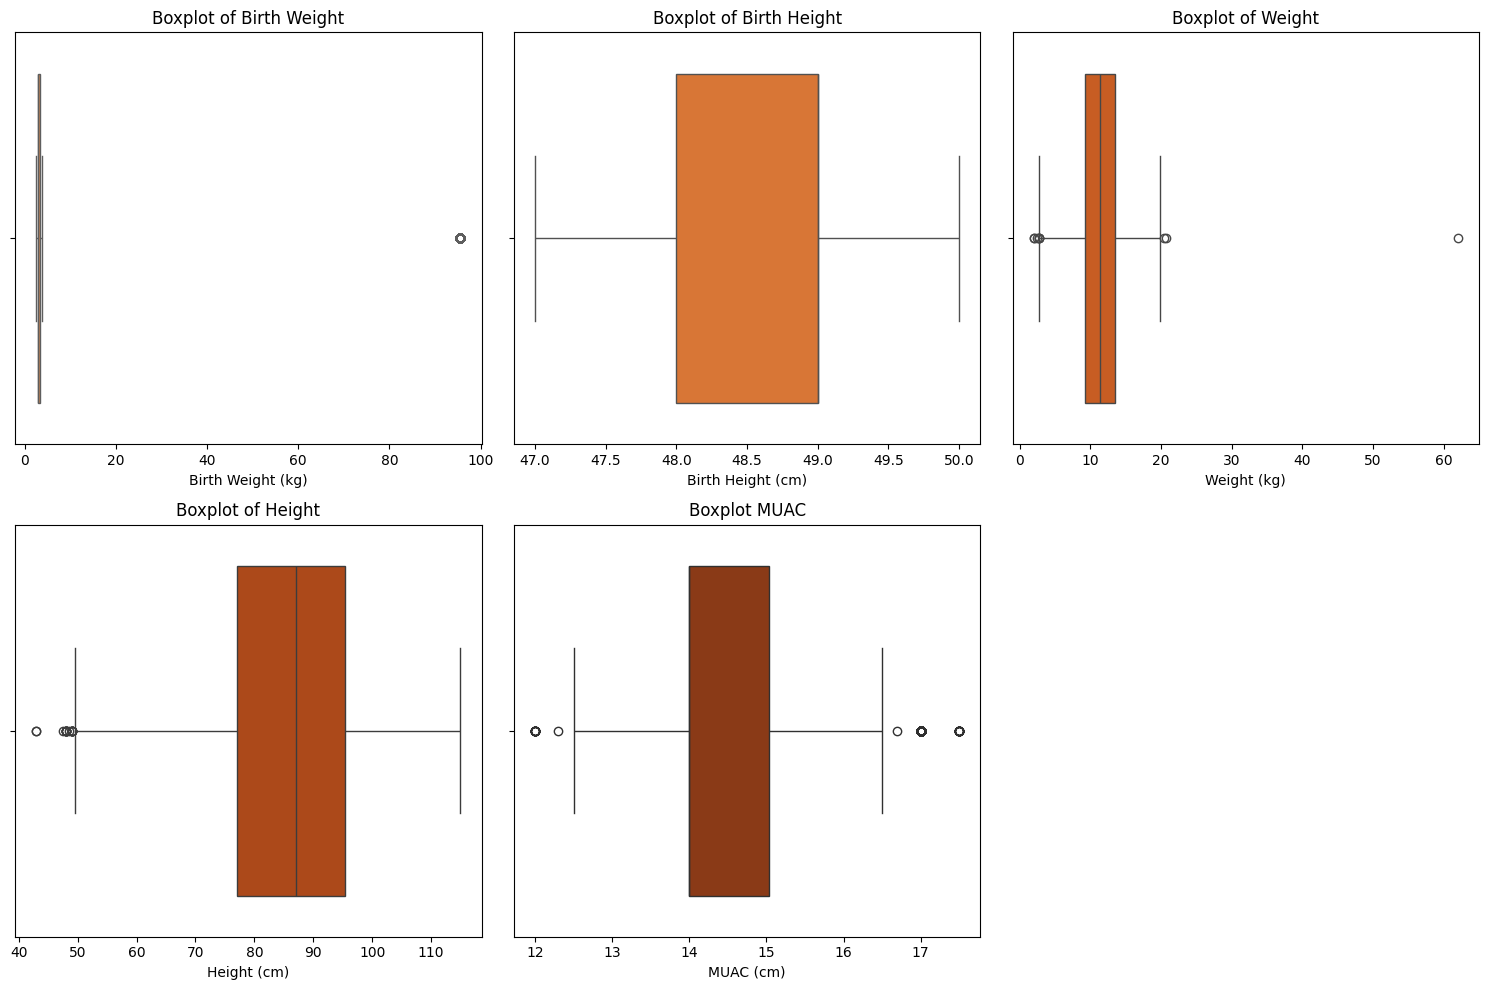

In [679]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import numpy as np

# Ambil colormap "Oranges"
orange_cmap = cm.get_cmap("Oranges")

# Ambil 5 gradasi warna orange dari tua ke muda
colors = [orange_cmap(i) for i in np.linspace(0.5, 0.9, 5)]

# Membuat subplots dengan 2 baris dan 3 kolom
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Boxplot BB Lahir
sns.boxplot(x=data_clean["Birth Weight"], ax=axs[0, 0], color=colors[0])
axs[0, 0].set_title("Boxplot of Birth Weight")
axs[0, 0].set_xlabel("Birth Weight (kg)")

# Boxplot TB Lahir
sns.boxplot(x=data_clean["Birth Height"], ax=axs[0, 1], color=colors[1])
axs[0, 1].set_title("Boxplot of Birth Height")
axs[0, 1].set_xlabel("Birth Height (cm)")

# Boxplot Berat Badan
sns.boxplot(x=data_clean["Weight"], ax=axs[0, 2], color=colors[2])
axs[0, 2].set_title("Boxplot of Weight")
axs[0, 2].set_xlabel("Weight (kg)")

# Boxplot Tinggi Badan
sns.boxplot(x=data_clean["Height"], ax=axs[1, 0], color=colors[3])
axs[1, 0].set_title("Boxplot of Height")
axs[1, 0].set_xlabel("Height (cm)")

# Boxplot MUAC
sns.boxplot(x=data_clean["MUAC"], ax=axs[1, 1], color=colors[4])
axs[1, 1].set_title("Boxplot MUAC")
axs[1, 1].set_xlabel("MUAC (cm)")

# Hapus subplot kosong
fig.delaxes(axs[1, 2])

# Tata letak rapih
plt.tight_layout()

# Simpan gambar
plt.savefig("boxplot_analysis_oranges.png", dpi=300)

# Tampilkan
plt.show()


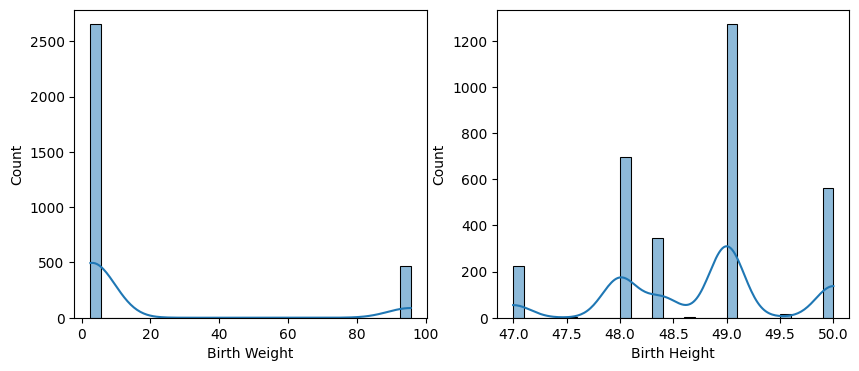

In [680]:
#Histogram
fig, axs = plt.subplots(1,2, figsize=(10,4))

sns.histplot(data_clean["Birth Weight"],bins=30, kde=True, ax=axs[0])
sns.histplot(data_clean["Birth Height"],bins=30, kde=True, ax=axs[1])

plt.show()

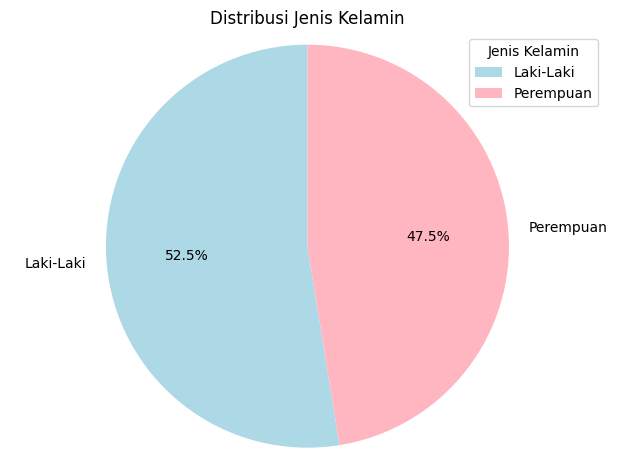

In [681]:
# Membuat pie chart distribusi jenis kelamin
fig, axs = plt.subplots()

jk_counts = fix_data["JK"].value_counts()
labels = ["Laki-Laki" if jk == "L" else "Perempuan" for jk in jk_counts.index]

axs.pie(jk_counts.values, labels=labels, autopct="%.1f%%", startangle=90, colors=["lightblue", "lightpink"])
axs.set_title("Distribusi Jenis Kelamin")

plt.legend(title="Jenis Kelamin")
plt.axis('equal')
plt.tight_layout()
plt.show()

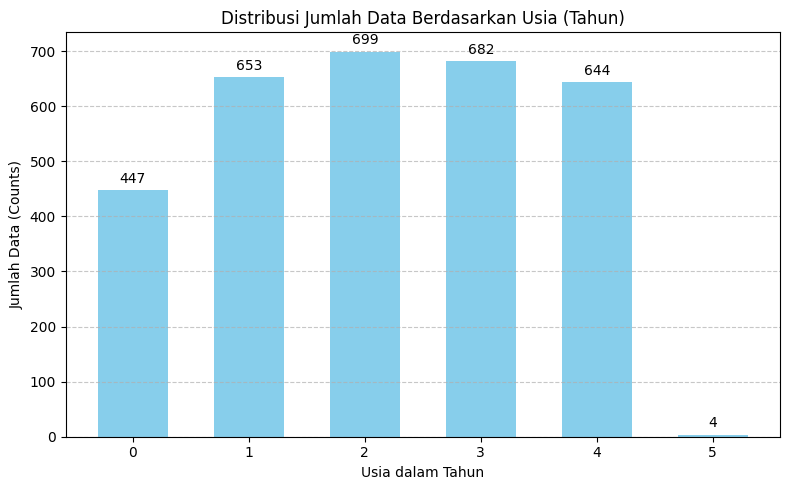

In [682]:
import matplotlib.pyplot as plt

# Konversi usia ke tahun dengan pembulatan ke bawah (bilangan bulat)
fix_data["Usia dalam Tahun"] = fix_data["Usia dalam bulan"] // 12

# Hitung jumlah data untuk tiap usia dalam tahun
usia_counts = fix_data["Usia dalam Tahun"].value_counts().sort_index()

# Buat bar plot
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(usia_counts.index, usia_counts.values, color="skyblue", width=0.6)

# Tambahkan label dan judul
ax.set_xlabel("Usia dalam Tahun")
ax.set_ylabel("Jumlah Data (Counts)")
ax.set_title("Distribusi Jumlah Data Berdasarkan Usia (Tahun)")

# Tambahkan garis grid horizontal
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Tambahkan label nilai di atas batang
ax.bar_label(bars, fmt='%d', padding=3, fontsize=10, color='black')

# Tampilkan plot
plt.tight_layout()
plt.show()

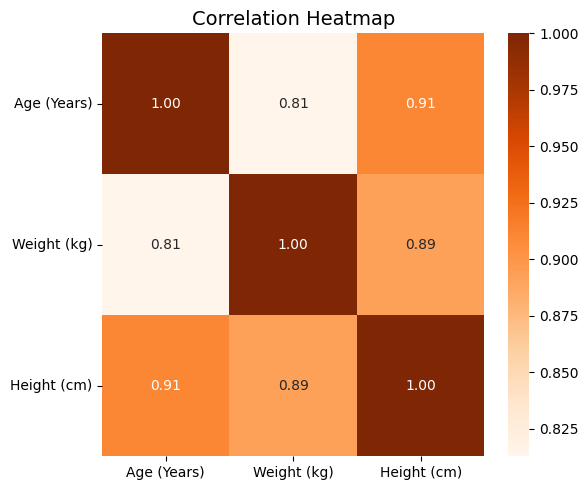

In [683]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih dan salin kolom yang dibutuhkan
data_heatmap = fix_data[['Usia dalam Tahun', 'Weight', 'Height']].copy()

# Pastikan semuanya numerik
data_heatmap = data_heatmap.apply(pd.to_numeric, errors='coerce')

# Hapus baris yang mengandung NaN
data_heatmap.dropna(inplace=True)

# Dictionary label ke Bahasa Inggris
column_labels = {
    "Usia dalam Tahun": "Age (Years)",
    "Weight": "Weight (kg)",
    "Height": "Height (cm)"
}

# Plot heatmap
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(data_heatmap.corr(), annot=True, cmap="Oranges", fmt=".2f", ax=ax)

# Ubah label sumbu ke Bahasa Inggris
ax.set_xticklabels([column_labels[col] for col in data_heatmap.columns], rotation=0, ha="center")
ax.set_yticklabels([column_labels[col] for col in data_heatmap.columns], rotation=0)

# Judul dan simpan file
plt.title("Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.savefig("Heatmap_of_Feature_Correlation_Oranges.png", dpi=300, bbox_inches="tight")

plt.show()


# Encode

In [684]:
fix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   JK                3129 non-null   object 
 1   Tahun Lahir       3129 non-null   int32  
 2   Bulan Lahir       3129 non-null   int32  
 3   Hari Lahir        3129 non-null   int32  
 4   Birth Weight      3129 non-null   float64
 5   Birth Height      3129 non-null   float64
 6   Usia Saat Ukur    3129 non-null   object 
 7   Usia dalam bulan  3129 non-null   float64
 8   Weight            3129 non-null   float64
 9   Height            3129 non-null   float64
 10  MUAC              3129 non-null   float64
 11  BB/U              3129 non-null   object 
 12  TB/U              3129 non-null   object 
 13  BB/TB             3129 non-null   object 
 14  Usia dalam Tahun  3129 non-null   float64
dtypes: float64(7), int32(3), object(5)
memory usage: 330.1+ KB


In [685]:
from sklearn.preprocessing import LabelEncoder

# Mapping kategori ke angka
bb_u_mapping = {
    'Berat Badan Normal': 0,
    'Kurang': 1,
    'Sangat Kurang': 1,
    'Risiko Lebih': 2
}

tb_u_mapping = {
    'Normal': 0,
    'Pendek': 1,
    'Sangat Pendek': 1,
    'Tinggi': 2
}

bb_tb_mapping = {
    'Normal': 0,
    'Gizi Kurang': 1,
    'Beresiko Gizi Lebih': 2,
    'Outlier': 2,
    'Gizi Lebih': 2,
    'Gizi Buruk': 2,
    'Obesitas': 2
}

# Melakukan encoding dengan mapping
fix_data["Encode BB/U"] = fix_data["BB/U"].map(bb_u_mapping)
fix_data["Encode TB/U"] = fix_data["TB/U"].map(tb_u_mapping)
fix_data["Encode BB/TB"] = fix_data["BB/TB"].map(bb_tb_mapping)

# Jika 'JK' hanya memiliki 2 kategori (Laki-laki & Perempuan), bisa pakai map langsung:
jk_mapping = {'L': 0, 'P': 1}
fix_data["Encode JK"] = fix_data["JK"].map(jk_mapping)

# Jika ada kategori yang tidak masuk dalam mapping, bisa diisi dengan nilai default (misal: -1)
fix_data.fillna(-1, inplace=True)

In [686]:
# Menghitung jumlah kategori
bb_u_counts = fix_data["Encode BB/U"].value_counts().sort_index()
tb_u_counts = fix_data["Encode TB/U"].value_counts().sort_index()
bb_tb_counts = fix_data["Encode BB/TB"].value_counts().sort_index()

# Pemetaan kode ke kategori asli yang benar
category_labels_bb_u = {0: 'Berat Badan Normal', 1: 'Kurang', 2: 'Risiko Lebih', 3: 'Sangat Kurang'}
category_labels_tb_u = {0: 'Normal', 1: 'Pendek', 2: 'Sangat Pendek', 3: 'Tinggi'}
category_labels_bb_tb = {0: 'Beresiko Gizi Lebih', 1: 'Gizi Buruk', 2: 'Gizi Kurang',
                         3: 'Gizi Lebih', 4: 'Normal', 5: 'Obesitas', 6: 'Outlier'}

In [687]:
fix_data[["Encode JK","BB/U", "TB/U", "BB/TB", "Encode BB/U", "Encode TB/U", "Encode BB/TB"]].value_counts()

# Unique values in BB/U: ['Berat Badan Normal : 0 ' 'Kurang : 1' 'Sangat Kurang : 3 ' 'Risiko Lebih : 2 ']
# Unique values in TB/U: ['Normal : 0 ' 'Pendek' : 1  'Sangat Pendek' : 2 'Tinggi : 3']
# Unique values in BB/TB: ['Normal : 4' 'Gizi Kurang : 2' 'Beresiko Gizi Lebih : 0' 'Outlier: 6' 'Gizi Lebih : 3 ''Gizi Buruk : 1 ' 'Obesitas : 5']

Encode JK  BB/U                TB/U           BB/TB                Encode BB/U  Encode TB/U  Encode BB/TB
0          Berat Badan Normal  Normal         Normal               0            0            0               1043
1          Berat Badan Normal  Normal         Normal               0            0            0                967
0          Berat Badan Normal  Pendek         Normal               0            1            0                186
1          Berat Badan Normal  Pendek         Normal               0            1            0                165
0          Kurang              Pendek         Normal               1            1            0                100
1          Kurang              Pendek         Normal               1            1            0                 88
           Berat Badan Normal  Normal         Beresiko Gizi Lebih  0            0            2                 67
0          Kurang              Sangat Pendek  Normal               1            1            0                 54
           Berat Badan Normal  Normal         Beresiko Gizi Lebih  0            0            2                 53
1          Kurang              Normal         Normal               1            0            0                 40
0          Berat Badan Normal  Normal         Gizi Kurang          0            0            1                 39
           Kurang              Normal         Normal               1            0            0                 37
1          Kurang              Sangat Pendek  Normal               1            1            0                 32
           Berat Badan Normal  Normal         Gizi Kurang          0            0            1                 30
0          Kurang              Normal         Gizi Kurang          1            0            1                 28
1          Kurang              Normal         Gizi Kurang          1            0            1                 22
0          Kurang              Pendek         Gizi Kurang          1            1            1                 22
           Berat Badan Normal  Pendek         Beresiko Gizi Lebih  0            1            2                 15
           Sangat Kurang       Sangat Pendek  Gizi Kurang          1            1            1                 14
1          Sangat Kurang       Pendek         Gizi Kurang          1            1            1                 14
0          Berat Badan Normal  Sangat Pendek  Normal               0            1            0                 13
1          Kurang              Pendek         Gizi Kurang          1            1            1                 10
0          Sangat Kurang       Pendek         Gizi Kurang          1            1            1                  8
1          Berat Badan Normal  Sangat Pendek  Normal               0            1            0                  8
0          Berat Badan Normal  Sangat Pendek  Beresiko Gizi Lebih  0            1            2                  8
1          Berat Badan Normal  Pendek         Beresiko Gizi Lebih  0            1            2                  7
0          Sangat Kurang       Sangat Pendek  Gizi Buruk           1            1            2                  6
1          Sangat Kurang       Sangat Pendek  Gizi Kurang          1            1            1                  6
           Berat Badan Normal  Normal         Gizi Lebih           0            0            2                  5
0          Sangat Kurang       Sangat Pendek  Normal               1            1            0                  4
1          Sangat Kurang       Pendek         Normal               1            1            0                  4
                               Sangat Pendek  Normal               1            1            0                  4
0          Berat Badan Normal  Normal         Gizi Lebih           0            0            2                  3
                               Pendek         Gizi Lebih           0            1            2                  2
1          Berat B

In [688]:
fix_data.drop(["JK", "Usia Saat Ukur", "BB/U","TB/U","BB/TB"], axis=1, inplace=True)
fix_data.head()

,Tahun Lahir,Bulan Lahir,Hari Lahir,Birth Weight,Birth Height,Usia dalam bulan,Weight,Height,MUAC,Usia dalam Tahun,Encode BB/U,Encode TB/U,Encode BB/TB,Encode JK
0,2019,11,9,2.8,49.0,58.1,18.2,113.0,14.0,4.0,0,0,0,0
1,2019,9,17,2.9,49.0,59.8,17.8,107.0,19.0,4.0,0,0,0,0
2,2019,10,23,3.0,49.0,58.4,15.3,103.0,14.0,4.0,0,0,0,1
3,2019,9,9,3.4,49.0,59.9,17.1,102.5,14.0,4.0,0,0,0,1
4,2019,9,13,3.0,48.0,59.7,14.1,108.2,16.0,4.0,0,0,1,0


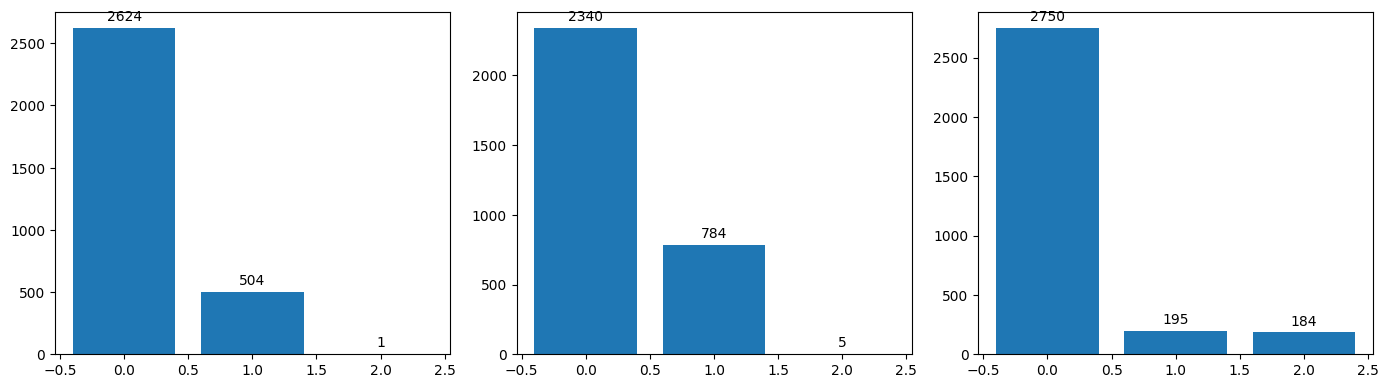

In [689]:
data = fix_data[["Encode BB/U", "Encode TB/U", "Encode BB/TB"]]
data_bbu = data["Encode BB/U"].value_counts().sort_index()
data_tbu = data["Encode TB/U"].value_counts().sort_index()
data_bbtb = data["Encode BB/TB"].value_counts().sort_index()

data_bbu.index
fig, ax = plt.subplots(1,3, figsize=(14,4))

bars_BBu = ax[0].bar(data_bbu.index, data_bbu.values)
ax[0].bar_label(bars_BBu, fmt='%d', padding=3, fontsize=10, color='black')

bars_BBu = ax[1].bar(data_tbu.index, data_tbu.values)
ax[1].bar_label(bars_BBu, fmt='%d', padding=3, fontsize=10, color='black')

bars_BBu = ax[2].bar(data_bbtb.index, data_bbtb.values)
ax[2].bar_label(bars_BBu, fmt='%d', padding=3, fontsize=10, color='black')

plt.tight_layout()
plt.show()

In [690]:
filter_data = fix_data[(fix_data["Encode BB/U"] == 2) | (fix_data["Encode TB/U"] == 2)].index
fix_data.drop(filter_data, inplace=True)
fix_data.head()

,Tahun Lahir,Bulan Lahir,Hari Lahir,Birth Weight,Birth Height,Usia dalam bulan,Weight,Height,MUAC,Usia dalam Tahun,Encode BB/U,Encode TB/U,Encode BB/TB,Encode JK
0,2019,11,9,2.8,49.0,58.1,18.2,113.0,14.0,4.0,0,0,0,0
1,2019,9,17,2.9,49.0,59.8,17.8,107.0,19.0,4.0,0,0,0,0
2,2019,10,23,3.0,49.0,58.4,15.3,103.0,14.0,4.0,0,0,0,1
3,2019,9,9,3.4,49.0,59.9,17.1,102.5,14.0,4.0,0,0,0,1
4,2019,9,13,3.0,48.0,59.7,14.1,108.2,16.0,4.0,0,0,1,0


/tmp/ipython-input-691-2466510946.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  orange_cmap = cm.get_cmap('Oranges')
/tmp/ipython-input-691-2466510946.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels_bbu, y=data_bbu.values, palette=colors_bbu, ax=ax[0])
/tmp/ipython-input-691-2466510946.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels_tbu, y=data_tbu.values, palette=colors_tbu, ax=ax[1])
/tmp/ipython-input-691-2466510946.py:41: FutureWarning: 

Passing `palette` without assigning `h

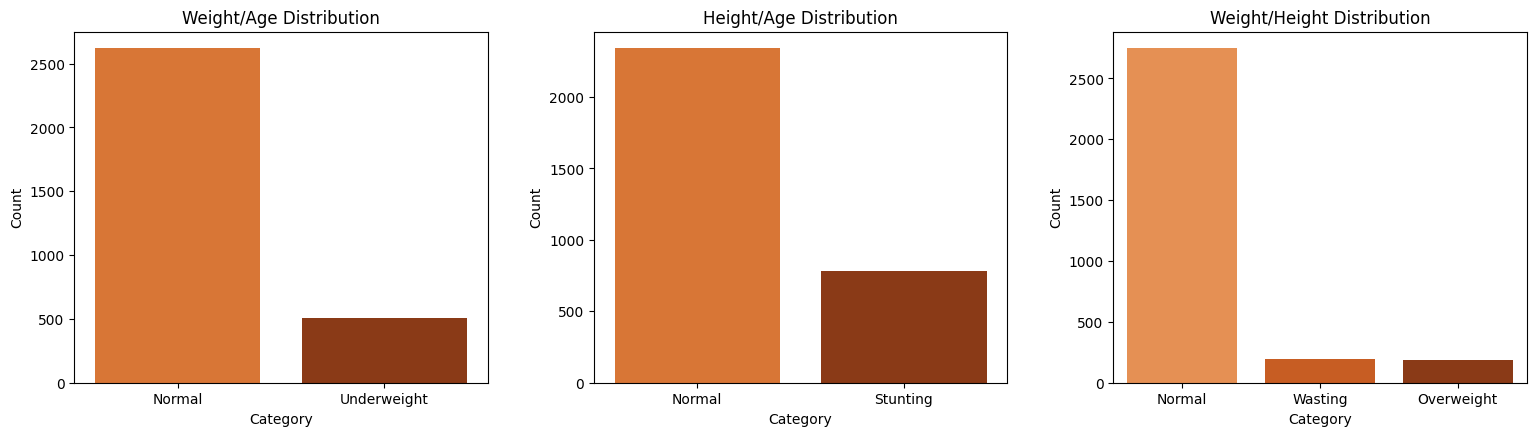

In [691]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import numpy as np

# Ambil kolom kategori
data = data_clean[["Encode BB/U", "Encode TB/U", "Encode BB/TB"]]

# Hitung distribusi nilai
data_bbu = data["Encode BB/U"].value_counts().sort_index()
data_tbu = data["Encode TB/U"].value_counts().sort_index()
data_bbtb = data["Encode BB/TB"].value_counts().sort_index()

# Definisi label kategori
labels_bbu = ["Normal", "Underweight"]
labels_tbu = ["Normal", "Stunting"]
labels_bbtb = ["Normal", "Wasting", "Overweight"]

# Ambil gradasi warna dari colormap 'Oranges'
orange_cmap = cm.get_cmap('Oranges')
colors_bbu = [orange_cmap(i) for i in np.linspace(0.6, 0.9, 2)]    # untuk 2 kategori
colors_tbu = [orange_cmap(i) for i in np.linspace(0.6, 0.9, 2)]    # untuk 2 kategori
colors_bbtb = [orange_cmap(i) for i in np.linspace(0.5, 0.9, 3)]   # untuk 3 kategori

# Membuat figure dan axes
fig, ax = plt.subplots(1, 3, figsize=(16, 5))

# Barplot BB/U
sns.barplot(x=labels_bbu, y=data_bbu.values, palette=colors_bbu, ax=ax[0])
ax[0].set_title("Weight/Age Distribution")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Category")

# Barplot TB/U
sns.barplot(x=labels_tbu, y=data_tbu.values, palette=colors_tbu, ax=ax[1])
ax[1].set_title("Height/Age Distribution")
ax[1].set_ylabel("Count")
ax[1].set_xlabel("Category")

# Barplot BB/TB
sns.barplot(x=labels_bbtb, y=data_bbtb.values, palette=colors_bbtb, ax=ax[2])
ax[2].set_title("Weight/Height Distribution")
ax[2].set_ylabel("Count")
ax[2].set_xlabel("Category")

plt.tight_layout(pad=3)
plt.savefig("distribution_target_oranges.png", dpi=300)
plt.show()


In [692]:
# Konversi usia ke tahun (dibulatkan ke bawah)
usia_tahun = fix_data["Usia dalam bulan"] // 12

# Tambahkan kolom baru jika belum ada
if "Usia (Tahun)" not in fix_data.columns:
    fix_data.insert(6, "Usia (Tahun)", usia_tahun)

# Filter data dengan usia 0 tahun atau kurang
filter = fix_data["Usia (Tahun)"] <= 0

# Tampilkan data yang memenuhi kondisi
invalid_usia = fix_data.loc[filter]

# Menampilkan ringkasan frekuensi dari data tidak valid
print("Jumlah data dengan usia <= 0 tahun:")
print(invalid_usia.value_counts())


Jumlah data dengan usia <= 0 tahun:
Tahun Lahir  Bulan Lahir  Hari Lahir  Birth Weight  Birth Height  Usia dalam bulan  Usia (Tahun)  Weight  Height  MUAC  Usia dalam Tahun  Encode BB/U  Encode TB/U  Encode BB/TB  Encode JK
2024         4            17          95.604561     50.0          4.9               0.0           6.1     60.0    15.0  0.0               0            1            0             0            2
             3            22          3.200000      49.0          5.5               0.0           6.1     66.0    14.0  0.0               0            0            1             1            2
2023         11           16          3.000000      49.0          9.8               0.0           8.4     68.0    14.0  0.0               0            1            0             0            2
                          10          3.000000      48.0          10.0              0.0           8.2     64.0    14.0  0.0               0            1            2             0            2
    

In [693]:
# Misalkan 'Encode BB/U', 'Encode TB/U', dan 'Encode BB/TB' adalah target
# Pastikan fix_data memiliki kolom-kolom tersebut
X = fix_data.drop(['Encode BB/U', 'Encode TB/U', 'Encode BB/TB'], axis=1)  # Fitur
y = fix_data[['Encode BB/U']]  # Target

# Split data 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Tampilkan 5 baris pertama dari training set
print("X_train:")
print(X_train.head())
print("\ny_train:")
print(y_train.head())


X_train:
      Tahun Lahir  Bulan Lahir  Hari Lahir  Birth Weight  Birth Height  \
1748         2023           11           4     95.604561          51.0   
1970         2023            8          25      3.500000          50.0   
2761         2024            6          10     95.604561          50.0   
3125         2020           10          11      2.900000          50.0   
2492         2021            8          23      3.000000          49.0   

      Usia dalam bulan  Usia (Tahun)  Weight  Height  MUAC  Usia dalam Tahun  \
1748              10.2           0.0     9.8    72.0  14.0               0.0   
1970              12.3           1.0     9.7    73.2  15.0               1.0   
2761               3.1           0.0     4.5    53.0  14.0               0.0   
3125              46.7           3.0    12.1    98.0  14.0               3.0   
2492              36.6           3.0    11.4    86.0  14.0               3.0   

      Encode JK  
1748          0  
1970          0  
2761       

## Support Vector Machine (SVM)


Classification Report for Weight/Age:
              precision    recall  f1-score   support

           0       0.99      0.92      0.96       524
           1       0.71      0.95      0.81       101

    accuracy                           0.93       625
   macro avg       0.85      0.94      0.88       625
weighted avg       0.94      0.93      0.93       625

Accuracy: 92.80%
Precision: 94.39%
Recall: 92.80%
F1-Score: 93.21%


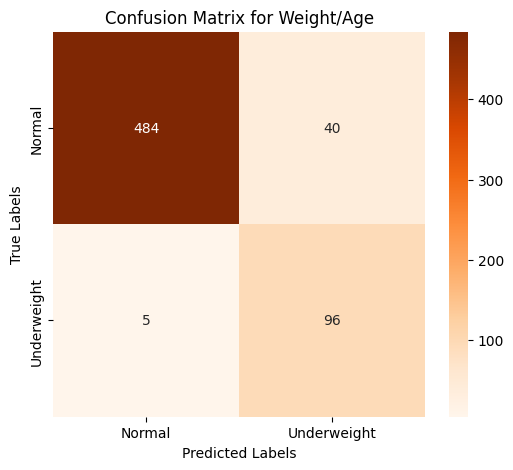


Classification Report for Height/Age:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       465
           1       0.73      0.95      0.82       160

    accuracy                           0.90       625
   macro avg       0.85      0.91      0.88       625
weighted avg       0.92      0.90      0.90       625

Accuracy: 89.60%
Precision: 91.59%
Recall: 89.60%
F1-Score: 90.00%


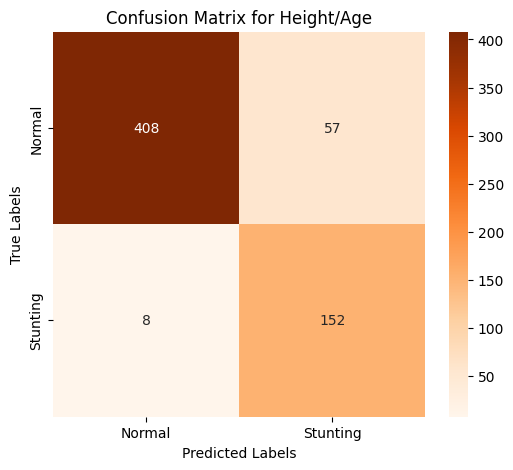


Classification Report for Weight/Height:
              precision    recall  f1-score   support

           0       0.99      0.83      0.90       558
           1       0.35      0.90      0.50        29
           2       0.40      0.84      0.54        38

    accuracy                           0.83       625
   macro avg       0.58      0.86      0.65       625
weighted avg       0.92      0.83      0.86       625

Accuracy: 83.36%
Precision: 91.99%
Recall: 83.36%
F1-Score: 86.04%


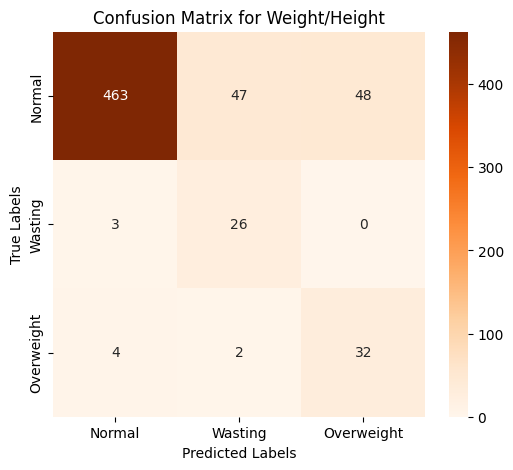

Semua confusion matrix disimpan di folder: output


In [694]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as ImbPipeline # Import ImbPipeline for compatibility with RandomOverSampler

# Misalkan 'BB/U', 'TB/U', dan 'BB/TB' adalah kolom target
X = data_clean.drop(columns=['Encode BB/U', 'Encode TB/U', 'Encode BB/TB'])  # Fitur
y = data_clean[['Encode BB/U', 'Encode TB/U', 'Encode BB/TB']]  # Target

# Split data menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline untuk preprocessing dan model SVM dengan RandomOverSampler
# Use ImbPipeline instead of Pipeline
pipeline = ImbPipeline([ # Changed to ImbPipeline
    ('oversampling', RandomOverSampler(random_state=42)),
    ('preprocessing', ColumnTransformer([
        ('imputer', SimpleImputer(strategy='mean'), X.columns),
        ('log', FunctionTransformer(np.log1p, validate=True), X.columns)
    ], remainder='passthrough', verbose_feature_names_out=False)),
    ('scaler', StandardScaler()),
    ('svc', SVC(C=1.0, kernel='rbf', gamma='scale', random_state=42))
])

# MultiOutputClassifier untuk menangani multi-target classification
model = MultiOutputClassifier(pipeline)

# Melatih model dengan data training
model.fit(X_train, y_train)

# Prediksi pada data uji
predictions_svm = np.column_stack(model.predict(X_test)).T

# Definisi label kategori untuk setiap target
labels_dict = {
    "Encode BB/U": ["Normal", "Underweight"],
    "Encode TB/U": ["Normal", "Stunting"],
    "Encode BB/TB": ["Normal", "Wasting", "Overweight"]
}

titles_dict = {
    "Encode BB/U": "Weight/Age",
    "Encode TB/U": "Height/Age",
    "Encode BB/TB": "Weight/Height"
}

# Buat folder output jika belum ada
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)

# Evaluasi model untuk setiap target
for i, target in enumerate(y.columns):
    print(f"\nClassification Report for {titles_dict[target]}:")
    print(classification_report(y_test[target], predictions[:, i], zero_division=1))

    # Hitung metrik evaluasi
    acc = accuracy_score(y_test[target], predictions[:, i])
    prec = precision_score(y_test[target], predictions[:, i], average='weighted', zero_division=1)
    rec = recall_score(y_test[target], predictions[:, i], average='weighted')
    f1 = f1_score(y_test[target], predictions[:, i], average='weighted')

    print(f"Accuracy: {acc:.2%}")
    print(f"Precision: {prec:.2%}")
    print(f"Recall: {rec:.2%}")
    print(f"F1-Score: {f1:.2%}")

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test[target], predictions[:, i])
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
                xticklabels=labels_dict[target], yticklabels=labels_dict[target])
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix for {titles_dict[target]}")

    # Simpan gambar dengan nama file yang valid
    safe_target = target.replace(" ", "_").replace("/", "_")
    save_path = os.path.join(output_dir, f"confusion_matrix_{safe_target}.png")
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

print(f"Semua confusion matrix disimpan di folder: {output_dir}")

## K-Nearest Neighbors (K-NN)


Classification Report for Weight/Age:
              precision    recall  f1-score   support

           0       0.99      0.92      0.96       524
           1       0.71      0.95      0.81       101

    accuracy                           0.93       625
   macro avg       0.85      0.94      0.88       625
weighted avg       0.94      0.93      0.93       625

Accuracy: 92.80%
Precision: 94.39%
Recall: 92.80%
F1-Score: 93.21%


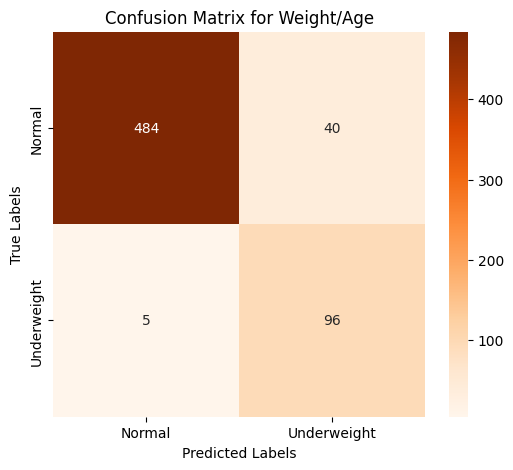


Classification Report for Height/Age:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       465
           1       0.73      0.95      0.82       160

    accuracy                           0.90       625
   macro avg       0.85      0.91      0.88       625
weighted avg       0.92      0.90      0.90       625

Accuracy: 89.60%
Precision: 91.59%
Recall: 89.60%
F1-Score: 90.00%


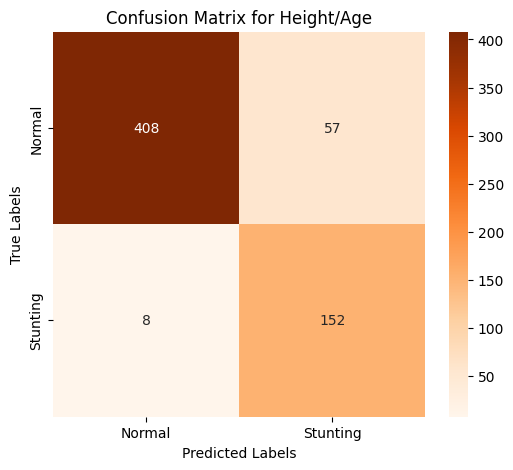


Classification Report for Weight/Height:
              precision    recall  f1-score   support

           0       0.99      0.83      0.90       558
           1       0.35      0.90      0.50        29
           2       0.40      0.84      0.54        38

    accuracy                           0.83       625
   macro avg       0.58      0.86      0.65       625
weighted avg       0.92      0.83      0.86       625

Accuracy: 83.36%
Precision: 91.99%
Recall: 83.36%
F1-Score: 86.04%


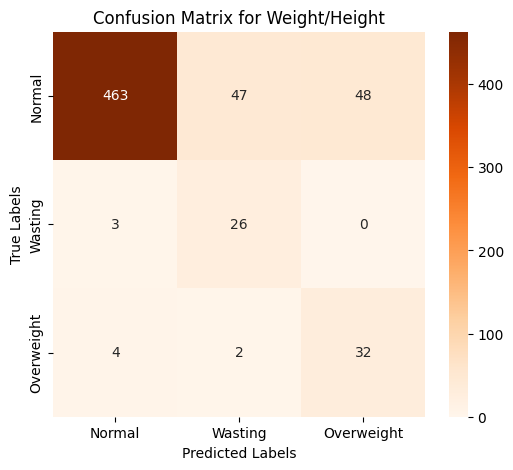

Semua confusion matrix disimpan di folder: output


In [695]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as ImbPipeline

# Misalkan 'BB/U', 'TB/U', dan 'BB/TB' adalah kolom target
X = data_clean.drop(columns=['Encode BB/U', 'Encode TB/U', 'Encode BB/TB'])  # Fitur
y = data_clean[['Encode BB/U', 'Encode TB/U', 'Encode BB/TB']]  # Target

# Split data menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline untuk preprocessing dan model KNN dengan RandomOverSampler
pipeline = ImbPipeline([
    ('oversampling', RandomOverSampler(random_state=42)),
    ('preprocessing', ColumnTransformer([
        ('imputer', SimpleImputer(strategy='mean'), X.columns),
        ('log', FunctionTransformer(np.log1p, validate=True), X.columns)
    ], remainder='passthrough', verbose_feature_names_out=False)),
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))  # Gantilah jumlah tetangga sesuai kebutuhan
])

# MultiOutputClassifier untuk menangani multi-target classification
model = MultiOutputClassifier(pipeline)

# Melatih model dengan data training
model.fit(X_train, y_train)

# Prediksi pada data uji
predictions_knn = np.column_stack(model.predict(X_test)).T

# Definisi label kategori untuk setiap target
labels_dict = {
    "Encode BB/U": ["Normal", "Underweight"],
    "Encode TB/U": ["Normal", "Stunting"],
    "Encode BB/TB": ["Normal", "Wasting", "Overweight"]
}

titles_dict = {
    "Encode BB/U": "Weight/Age",
    "Encode TB/U": "Height/Age",
    "Encode BB/TB": "Weight/Height"
}

# Buat folder output jika belum ada
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)

# Evaluasi model untuk setiap target
for i, target in enumerate(y.columns):
    print(f"\nClassification Report for {titles_dict[target]}:")
    print(classification_report(y_test[target], predictions[:, i], zero_division=1))

    # Hitung metrik evaluasi
    acc = accuracy_score(y_test[target], predictions[:, i])
    prec = precision_score(y_test[target], predictions[:, i], average='weighted', zero_division=1)
    rec = recall_score(y_test[target], predictions[:, i], average='weighted')
    f1 = f1_score(y_test[target], predictions[:, i], average='weighted')

    print(f"Accuracy: {acc:.2%}")
    print(f"Precision: {prec:.2%}")
    print(f"Recall: {rec:.2%}")
    print(f"F1-Score: {f1:.2%}")

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test[target], predictions[:, i])
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
                xticklabels=labels_dict[target], yticklabels=labels_dict[target])
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix for {titles_dict[target]}")

    # Simpan gambar dengan nama file yang valid
    safe_target = target.replace(" ", "_").replace("/", "_")
    save_path = os.path.join(output_dir, f"confusion_matrix_{safe_target}.png")
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

print(f"Semua confusion matrix disimpan di folder: {output_dir}")

## COMPARISON


Classification Report for Weight/Age (KNN):
              precision    recall  f1-score   support

           0       0.94      0.84      0.89       524
           1       0.47      0.73      0.57       101

    accuracy                           0.82       625
   macro avg       0.70      0.79      0.73       625
weighted avg       0.87      0.82      0.84       625


Classification Report for Height/Age (KNN):
              precision    recall  f1-score   support

           0       0.90      0.75      0.82       465
           1       0.52      0.77      0.62       160

    accuracy                           0.76       625
   macro avg       0.71      0.76      0.72       625
weighted avg       0.81      0.76      0.77       625


Classification Report for Weight/Height (KNN):
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       558
           1       0.28      0.66      0.39        29
           2       0.21      0.34      0.26  

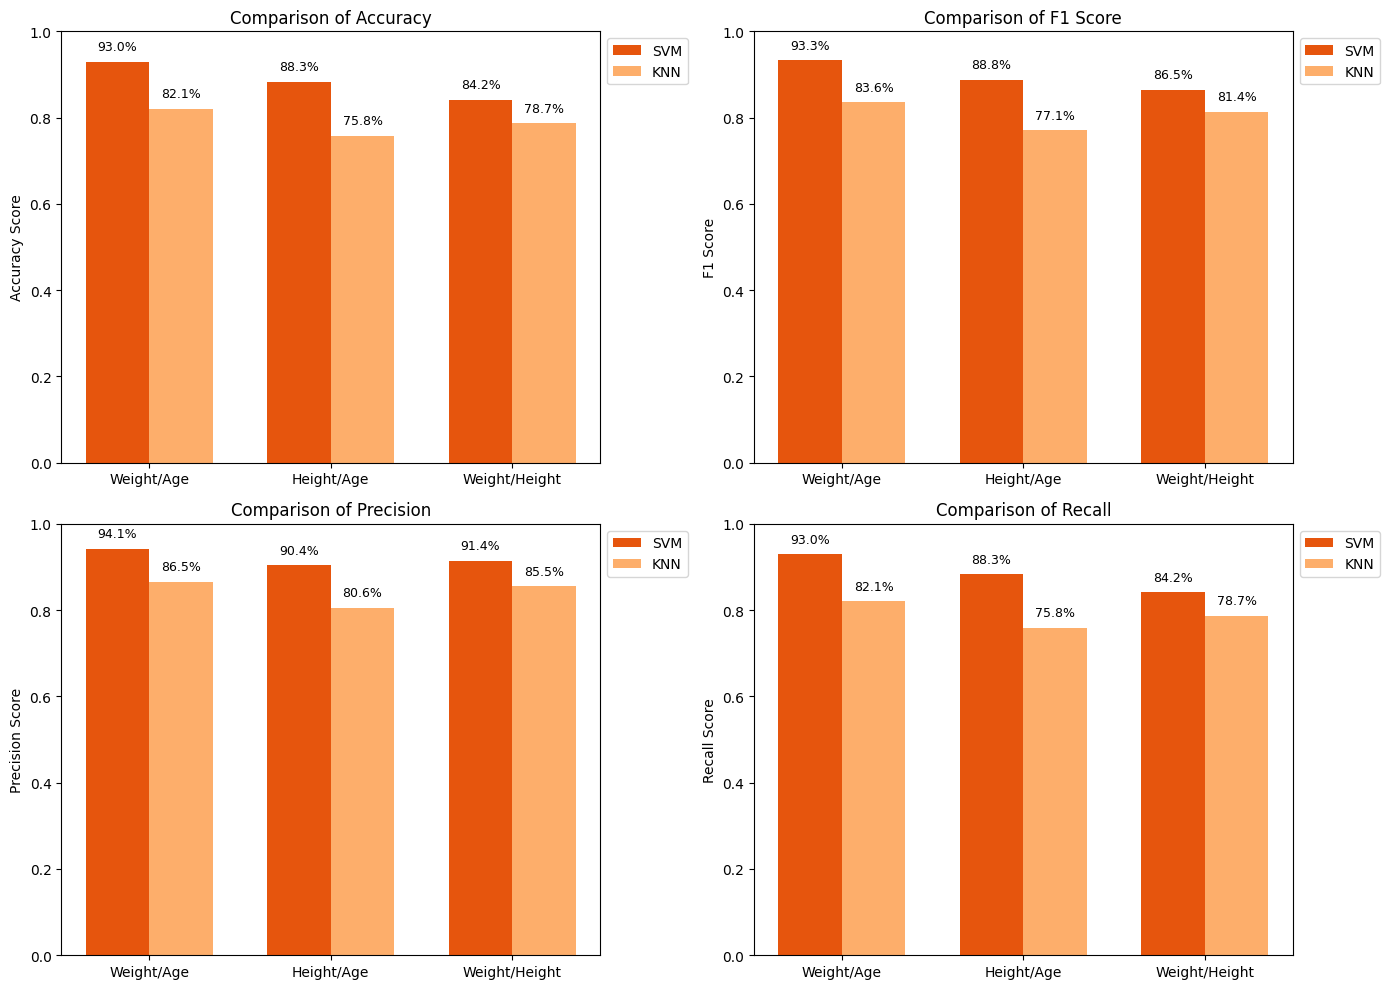

In [696]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import pandas as pd

# Daftar target dan label
targets = ["Encode BB/U", "Encode TB/U", "Encode BB/TB"]
custom_labels = ["Weight/Age", "Height/Age", "Weight/Height"]

# Dictionary label kategori per target
labels_dict = {
    "Encode BB/U": ["Normal", "Underweight"],
    "Encode TB/U": ["Normal", "Stunting"],
    "Encode BB/TB": ["Normal", "Wasting", "Overweight"]
}

# Dictionary untuk nama lebih deskriptif
titles_dict = {
    "Encode BB/U": "Weight/Age",
    "Encode TB/U": "Height/Age",
    "Encode BB/TB": "Weight/Height"
}

# Output direktori
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)

# Inisialisasi tabel hasil evaluasi
results = {
    "Model": [],
    "Target": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

# Fungsi evaluasi model
def evaluate_model(predictions, model_name):
    for i, target in enumerate(y.columns):
        acc = accuracy_score(y_test[target], predictions[:, i])
        prec = precision_score(y_test[target], predictions[:, i], average='weighted', zero_division=1)
        rec = recall_score(y_test[target], predictions[:, i], average='weighted', zero_division=1)
        f1 = f1_score(y_test[target], predictions[:, i], average='weighted', zero_division=1)

        results["Model"].append(model_name)
        results["Target"].append(titles_dict[target])
        results["Accuracy"].append(acc)
        results["Precision"].append(prec)
        results["Recall"].append(rec)
        results["F1-Score"].append(f1)

        # Print classification report
        print(f"\nClassification Report for {titles_dict[target]} ({model_name}):")
        print(classification_report(y_test[target], predictions[:, i], zero_division=1))

        # Confusion Matrix
        cm = confusion_matrix(y_test[target], predictions[:, i])
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
                    xticklabels=labels_dict[target], yticklabels=labels_dict[target])
        plt.xlabel("Predicted Labels")
        plt.ylabel("True Labels")
        plt.title(f"Confusion Matrix for {titles_dict[target]} ({model_name})")

        # Save confusion matrix image
        safe_target = target.replace(" ", "_").replace("/", "_")
        save_path = os.path.join(output_dir, f"confusion_matrix_{safe_target}_{model_name.lower()}.png")
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.close()

evaluate_model(predictions_knn, "KNN")  # dari hasil model.predict(X_test)
evaluate_model(predictions_svm, "SVM")  # dari hasil model.predict(X_test)


# Buat dataframe hasil evaluasi dan tampilkan
results_df = pd.DataFrame(results)
print("\n===== Evaluasi Model KNN vs SVM =====")
print(results_df)

# Simpan hasil evaluasi ke file Excel/CSV
results_df.to_csv(os.path.join(output_dir, "evaluasi_model_knn_vs_svm.csv"), index=False)

import matplotlib.pyplot as plt
import numpy as np

# Ambil data untuk masing-masing model dan metrik
targets = ["Weight/Age", "Height/Age", "Weight/Height"]
bar_width = 0.35
index = np.arange(len(targets))

# Ambil nilai dari dataframe
accuracy_svm = results_df[results_df['Model'] == 'SVM']['Accuracy'].values
accuracy_knn = results_df[results_df['Model'] == 'KNN']['Accuracy'].values

f1_svm = results_df[results_df['Model'] == 'SVM']['F1-Score'].values
f1_knn = results_df[results_df['Model'] == 'KNN']['F1-Score'].values

precision_svm = results_df[results_df['Model'] == 'SVM']['Precision'].values
precision_knn = results_df[results_df['Model'] == 'KNN']['Precision'].values

recall_svm = results_df[results_df['Model'] == 'SVM']['Recall'].values
recall_knn = results_df[results_df['Model'] == 'KNN']['Recall'].values

# Buat 4 subplot: Accuracy, Precision, Recall, F1-Score
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
ax = ax.flatten()

# Gunakan tone oranye
color_svm = "#e6550d"   # oranye gelap
color_knn = "#fdae6b"   # oranye terang

bars1 = ax[0].bar(index - bar_width/2, accuracy_svm, bar_width, label="SVM", color=color_svm)
bars2 = ax[0].bar(index + bar_width/2, accuracy_knn, bar_width, label="KNN", color=color_knn)
ax[0].set_title("Comparison of Accuracy")
ax[0].set_ylabel("Accuracy Score")
ax[0].set_xticks(index)
ax[0].set_xticklabels(targets)
ax[0].set_ylim(0, 1)
ax[0].legend(loc='upper left', bbox_to_anchor=(1, 1))

bars3 = ax[1].bar(index - bar_width/2, f1_svm, bar_width, label="SVM", color=color_svm)
bars4 = ax[1].bar(index + bar_width/2, f1_knn, bar_width, label="KNN", color=color_knn)
ax[1].set_title("Comparison of F1 Score")
ax[1].set_ylabel("F1 Score")
ax[1].set_xticks(index)
ax[1].set_xticklabels(targets)
ax[1].set_ylim(0, 1)
ax[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

bars5 = ax[2].bar(index - bar_width/2, precision_svm, bar_width, label="SVM", color=color_svm)
bars6 = ax[2].bar(index + bar_width/2, precision_knn, bar_width, label="KNN", color=color_knn)
ax[2].set_title("Comparison of Precision")
ax[2].set_ylabel("Precision Score")
ax[2].set_xticks(index)
ax[2].set_xticklabels(targets)
ax[2].set_ylim(0, 1)
ax[2].legend(loc='upper left', bbox_to_anchor=(1, 1))

bars7 = ax[3].bar(index - bar_width/2, recall_svm, bar_width, label="SVM", color=color_svm)
bars8 = ax[3].bar(index + bar_width/2, recall_knn, bar_width, label="KNN", color=color_knn)
ax[3].set_title("Comparison of Recall")
ax[3].set_ylabel("Recall Score")
ax[3].set_xticks(index)
ax[3].set_xticklabels(targets)
ax[3].set_ylim(0, 1)
ax[3].legend(loc='upper left', bbox_to_anchor=(1, 1))

# Fungsi untuk menambahkan label persen
def add_percentage(bars, ax_ref):
    for bar in bars:
        height = bar.get_height()
        ax_ref.text(
            bar.get_x() + bar.get_width() / 2, height + 0.02,
            f'{height*100:.1f}%', ha='center', va='bottom', fontsize=9, color='black'
        )

# Tambahkan teks persentase
for i, bar_set in enumerate([[bars1, bars2], [bars3, bars4], [bars5, bars6], [bars7, bars8]]):
    add_percentage(bar_set[0], ax[i])
    add_percentage(bar_set[1], ax[i])

plt.tight_layout()
plt.show()


In [697]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np

# Contoh data dummy (ganti dengan dataset Anda)
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=200, n_features=10, n_classes=2, weights=[0.6, 0.4], random_state=42)

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Inisialisasi model
svm_model = SVC(kernel='rbf')
knn_model = KNeighborsClassifier(n_neighbors=5)

# Cross-validation setup
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

f1_scores_svm = []
f1_scores_knn = []

# Lakukan 10-fold CV
for train_index, test_index in kf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # SVM
    svm_model.fit(X_train, y_train)
    y_pred_svm = svm_model.predict(X_test)
    f1_svm = f1_score(y_test, y_pred_svm)
    f1_scores_svm.append(f1_svm)

    # KNN
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    f1_knn = f1_score(y_test, y_pred_knn)
    f1_scores_knn.append(f1_knn)

# Tampilkan hasil
print("F1 Score per fold (SVM):", f1_scores_svm)
print("Rata-rata F1 Score (SVM):", np.mean(f1_scores_svm))
print("Std Dev F1 Score (SVM):", np.std(f1_scores_svm))

print("\nF1 Score per fold (KNN):", f1_scores_knn)
print("Rata-rata F1 Score (KNN):", np.mean(f1_scores_knn))
print("Std Dev F1 Score (KNN):", np.std(f1_scores_knn))


F1 Score per fold (SVM): [0.9411764705882353, 0.8, 1.0, 0.8, 0.8235294117647058, 0.6153846153846154, 0.625, 0.8888888888888888, 0.8, 0.875]
Rata-rata F1 Score (SVM): 0.8168979386626445
Std Dev F1 Score (SVM): 0.11656032796790963

F1 Score per fold (KNN): [0.9411764705882353, 0.8235294117647058, 0.9333333333333333, 0.7692307692307693, 0.6666666666666666, 0.6153846153846154, 0.6666666666666666, 0.7058823529411765, 0.7692307692307693, 0.7777777777777778]
Rata-rata F1 Score (KNN): 0.7668878833584716
Std Dev F1 Score (KNN): 0.10401054260198112
